<a href="https://colab.research.google.com/github/raman-iisermohali/Repository/blob/main/Code_Construct_Closed_Subtheory_from_a_given_Compatibility_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The code does the following:
# 1. Take as input a Compatibility graph of a set of Unknown Paulis, say S, Constructs the CLOSED SUBTHEORY S'.
# 2. Construct the Compatibility graph of S'.
# 3. Check Chordality of S'.


# Note that our premise here is that we are given a Hamiltonian as a weighted sum of Paulis with real weights SO ANY '-' SIGN IN FRONT OF PAULIS IN S is assumed to be absorbed in the coefficients so that below we can mention the S(the starting set) with no signs
### Although this Code works perfectly well as long as the Paulis supplied are signed with (+-)1 ones but not with (+-) Iota. 

In [ ]:
# Since we only compute products of Commuting Signed Paulis where the two Commuting Signed PAULIS are Hermitian i.e. each only +-1 signed 
# this is because we start with a set of Hermitian(Signed +-1) Paulis only and then take the product of two which commute.
# if you change the starting set to any signed pauli from the Pauli group then this code won't work always.

In [ ]:
import networkx as nx
from networkx import isomorphism as ism
import numpy as np
import sys

In [ ]:
def Commute(A,B):
  m=0
  for i in B:
    for j in A:
      if i!=j:
        if (i,j) not in G.edges():
          m=m+1
  if m%2==0:
    return True
  else: 
    return False       

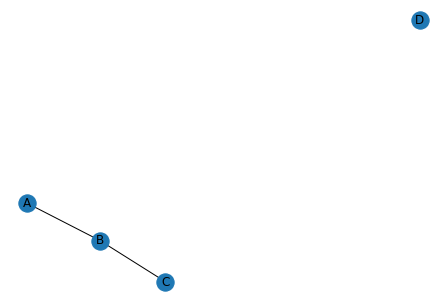

In [ ]:
G=[('A','B'),('B','C')]#,('C','D'),('D','E')]
#G=[('A','B'),('B','C')]
G=nx.Graph(G)
G.add_node('D')
nx.draw(G,with_labels=True)

In [ ]:
S=[]
for i in G.nodes():
  S.append(i)

In [ ]:
for i in G.edges():
  print(i[0]+i[1])  

AB
BC


In [ ]:
# Add all the directly inferred Commuting operators' product in S from the Compatibility graph
for i in G.edges():
  S.append(i[0]+i[1])
print(S)
print(len(G.nodes()))

['A', 'B', 'C', 'D', 'AB', 'BC']
4


In [ ]:
def signless(x):
  a=''
  if x[0]=='-':
    for i in range(1,len(x)):
      a=a+x[i]
  else:
    a=x
  return a  
def S_collector(A,x): #string collector
  a=[]
  h=signless(x)
  for s in A:
    if (s[0]=='-' and x[0]=='-') or (s[0]!='-' and x[0]!='-'):
      if len(s)==len(x):
        a.append(s)
    else:
      if s[0]=='-':
        c=''
        for j in range(1,len(s)):
          c=c+s[j]
        if len(h)==len(c):
          a.append(s) 
      else:
        if len(h)==len(s):
          a.append(s) 
  return a        
def Overall_phase(A,B): ### '-BDAEC', 'CDEAB' 
  a=[]
  b=[]
  c=0
  if A[0]=='-':
    c=c+1
  if B[0]=='-':
    c=c+1
  B=signless(B)
  A=signless(A)
  for q in range(0,len(A)): #(0,5)
    for w in range(0,len(B)):#(0,5)
      if A[q]==B[w]:
              ## Now we check the number of anticommuting terms between A[i=q] and B[j=w] for all equal terms in AB-(qwert)(ghqkl)
              if w!=0:
                for k in range(0,w):
                  if (B[w],B[k]) not in G.edges() and (k not in b):
                    c=c+1
                    #print(c)
              if q!=len(A)-1:
                for k in range(q+1,len(A)):
                  if (B[w],A[k]) not in G.edges() and (k not in a):
                    c=c+1
              a.append(q)
              b.append(w)                     
  if c%2==0:
    return 1
  else:
    return -1   
def Equal(S,H,x):
  a=S_collector(S,x)
  if H==S:
    b=[]
  else:   
    b=S_collector(H,x)
  f=signless(x)
  M=a+b
  X=[]
  for i in M: #we already have the signless version of x ready as P+Q whereas we need to construct the signless versions for observables in X
    if i[0]=='-':
      k=''
      for j in range(1,len(i)):
        k=k+i[j]
      X.append(k)
    else:
      X.append(i) 
  for i in range(0,len(X)):
    if X[i]!=x:
      m=0
      for k in f:
        for j in X[i]:
          if k==j:
            m=m+1
            continue
    else:
      m=len(f)       
    if m==len(f) and Overall_phase(x,M[i])==1:
      return True
  return False                   

In [ ]:
def Order(x):
#  if x=='I' or x=='-I':
 #   print("Yes")
  K=list(G.nodes()) # decides the order
  l=''
  c=0 # will count the anticommmuting terms
  for j in range(0,len(K)):
    if K[j] in x:
      i=x.index(K[j])
      Y=[k for k in K[0:j]] # stores all the elements before K[j] in order
      for k in range(0,i):
        if ((x[k],K[j]) not in G.edges()) and (x[k] not in Y): #This will even take care of the minus sign since x[0]='-' won't be in edges and in Y
          c=c+1
      l=l+K[j]
  if c%2!=0:
    l='-'+ l
    return l
  else:
    #if l=='':
     # print(x)
     # print(c)
    return l      

In [ ]:
a=len(G.nodes())
b=1
while a!=b: 
  H=[]            # stores the new unique products in a given iteration of while loop and adds them to S
  for i in range(a,len(S)): # Imagine [A,B,C,D,AB,BC,CD] for the first iteration of the while loop now we have i starting from AB till CD and j from A to D for AB, till A to Ab fo BC and so on. 
    for j in range(0,i):
      c=0             # keeps track of the number of -1 appearing in constructing AB below- Basically tells the overall phase AB(power of -1)
      m=0             # keeps track of the number of -1 appearing in constructing BA below- Basically tells the overall phase BA(power of -1)
      A=S[j] # here A=S[j] would be of the form GHJK where G,H,J and K are elements of the original S we started with
      B=S[i] 
      #remove '-' from A since that information is already stored in c and m.
      if A[0]=='-':
        c=c+1
        m=m+1
        A='' 
        for k in range(1,len(S[j])):
          A=A+S[j][k]
      ######    
      #remove '-' from B since that information is already stored in c and m.    
      if B[0]=='-':
        c=c+1
        m=m+1
        B='' 
        for k in range(1,len(S[i])):
          B=B+S[i][k] 
      ######## Next if they commute then we need to simplify (if required) them where simplification means that whatever common terms are there in A and B we remove them and also prepare so that AB or BA only one of them gets appended to S.    
      if Commute(A,B):
        R=[] #stores indices of A's terms which are equal to B's terms
        T=[] # stores indices of B's terms which are equal to A's terms
        for q in range(0,len(A)):
          for w in range(0,len(B)):
            if A[q]==B[w]:
              R.append(q)
              T.append(w)
              ## Now we check the number of anticommuting terms between A[i=q] and B[j=w] for all equal terms in AB-(qwert)(ghqkl)
              if w!=0:
                for k in range(0,w):
                  if (B[w],B[k]) not in G.edges():
                    c=c+1
              if q!=len(A)-1:
                for k in range(q+1,len(A)):
                  if (B[w],A[k]) not in G.edges():
                    c=c+1
              #########
              #### Now we check the number of anticommuting terms between B[j] and A[i] for all equal terms in  BA-(ghqkl)(qwert)     
              if q!=0:
                for k in range(0,q):
                  if (A[q],A[k]) not in G.edges():
                    m=m+1
              if w!=len(B)-1:
                for k in range(w+1,len(B)):
                  if (A[q],B[k]) not in G.edges():
                    m=m+1
              ########## 
              ####(Simplification) Next we remove these common elements from A and B 
          # P will contain A with element common to B removed
        P='' 
        for l in range(0,len(A)):
          if l not in R:
            P=P+A[l]
           ##### 
          # Q will contain B with element common to A removed   
        Q='' 
        for l in range(0,len(B)):
          if l not in T:
            Q=Q+B[l]
          #####
# Now we check conditions for c and m to care for the overall Phase and on P and Q to see when to append to H.
# x and y are simplified forms of products AB and BA respectively when AB=BA
        if (c%2!=0 and P==Q): # c is odd and P=Q
          x='-I'  
        elif (c%2!=0 and P!=Q and P!='I' and Q!='I'): # c is odd and P!=Q 
          x='-'+P+Q   
        elif (c%2==0 and P==Q): # c is even and P=Q
          x='I'
        elif (c%2==0 and P!=Q and P!='I' and Q!='I'): # c is even and P!=Q
          x=P+Q
        if (x=='I' or x=='-I'):
          x=x
        else:
          x=Order(x)  
        if (x not in S) and (x not in H) and (x!='' or x!='-'):
          H.append(x)
  # NOW STORE THE LENGTH OF S we started with before while loop's single iteration and then append whatever unique observables we stored in H to S and store the length of new S.          
  a=len(S)
  for c in H:
    S.append(c)
  print(S)  
  b=len(S)
if 'I' not in S:
  S.append('I')
if '-I' not in S:
  S.append('-I')  
for i in S:
  if i[0]=='-':
    i=signless(i)
    if not Equal(S,S,i):
      S.append(i)
  else:
    i='-'+i
    if not Equal(S,S,i):
      S.append(i)    


['A', 'B', 'C', 'D', 'AB', 'BC', 'ABD', 'BCD']
['A', 'B', 'C', 'D', 'AB', 'BC', 'ABD', 'BCD', '-ABCD', 'ABCD']
['A', 'B', 'C', 'D', 'AB', 'BC', 'ABD', 'BCD', '-ABCD', 'ABCD', '-BCD', '-A', '-ABD', '-C', '-I']
['A', 'B', 'C', 'D', 'AB', 'BC', 'ABD', 'BCD', '-ABCD', 'ABCD', '-BCD', '-A', '-ABD', '-C', '-I', '-D', '-B']
['A', 'B', 'C', 'D', 'AB', 'BC', 'ABD', 'BCD', '-ABCD', 'ABCD', '-BCD', '-A', '-ABD', '-C', '-I', '-D', '-B']


In [ ]:
print(len(S))

20


In [ ]:
print(S)

['A', 'B', 'C', 'D', 'AB', 'BC', 'ABD', 'BCD', '-ABCD', 'ABCD', '-BCD', '-A', '-ABD', '-C', '-I', '-D', '-B', 'I', '-AB', '-BC']
